# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [2]:
import pandas as pd
import os
def read_excels(position,folder):
    '''
    Input:  position: the root
            folder: the name of the folder in the root
    Output: a pandas.DataFrame
    Get the pandas.DataFrame which includes all the rows of 'fresh' in excel files in the folder
    '''
    result = pd.DataFrame()
    for root, dirs, files in os.walk(os.path.join(position,folder)):
        for name in files:
            new = pd.read_excel(os.path.join(position,folder,name),skiprows = [0])
            find = ['Fresh' in str(a) for a in new['Form']]
            new = new[find]
            new['type'] = folder
            new['food'] = name.split('.')[0]
            new.rename(columns = {'Average retail price ':'price_per_lb','Preparation':'yield',
                                  'Size of a ':'lb_per_cup','Average price':'price_per_cup','Form':'form'},inplace=True)
            result = result.append(new)

    result = result[['type','food','form','price_per_lb','yield','lb_per_cup','price_per_cup']]
    return result

fruit_fresh = read_excels(r'C:\Users\kevin\study\STA141B\assignment_3','fruit').dropna(axis=0)
fruit_fresh.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
1,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
1,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
1,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [3]:
vegetable_fresh = read_excels(r'C:\Users\kevin\study\STA141B\assignment_3','vegetables')
vegetable_fresh.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
1,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
1,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
1,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
1,vegetables,broccoli,Fresh,,,,NaN


In [4]:
tomatoes = pd.read_excel(r'C:\Users\kevin\study\STA141B\assignment_3\vegetables\tomatoes.xlsx',skiprows = [0])
tomatoes

,Form,Average retail price,Unnamed: 2,Preparation,Size of a,Unnamed: 5,Average price
0,NaN,NaN,NaN,yield factor,cup equivalent,NaN,per cup equivalent
1,Fresh,NaN,NaN,NaN,NaN,NaN,NaN
2,"Grape and cherry1,2",3.288960,per pound,0.91,0.374786,pounds,1.35457
3,"Roma1,3",1.243417,per pound,0.91,0.374786,pounds,0.512105
4,"Beefsteak1,4",3.159212,per pound,0.91,0.374786,pounds,1.30113
5,Canned5,0.924836,per pound,1,0.540133,pounds,0.499534
6,"1Includes greenhouse, hydroponic, and field-gr...",NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"2Includes cherry, grape, teardrop, pear, and c...",NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>The price for tomatoes is NaN. That is because the structure of that excel file is different from the others. 3 kinds of fresh tomatoes are listed there.</p>

In [5]:
vegetable_fresh[vegetable_fresh['price_per_lb'].isnull()].append(vegetable_fresh[vegetable_fresh['price_per_lb']==' '])

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,vegetables,carrots,Fresh,NaN,NaN,NaN,NaN
1,vegetables,celery,Fresh1,NaN,NaN,NaN,NaN
1,vegetables,mushrooms,Fresh1,NaN,NaN,NaN,NaN
1,vegetables,spinach,Fresh1,NaN,NaN,NaN,NaN
1,vegetables,tomatoes,Fresh,NaN,NaN,NaN,NaN
1,vegetables,broccoli,Fresh,,,,NaN
1,vegetables,cauliflower,Fresh1,,,,NaN
1,vegetables,lettuce_romaine,Fresh1,,NaN,,NaN


<p>Carrots, celery, muchrooms, spinach, broccoli, cauliflower and lettuce_romaine have the same problem.</p>

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [6]:
vegetable_fresh = vegetable_fresh.dropna(axis=0)
fresh = fruit_fresh.append(vegetable_fresh)

def turn_to_float(a):
    '''
    Input: a pandas.DataFrame
    Output: a pandas.DataFrame
    Change all columns of numbers from object to float
    '''
    try:
        a1 = float(a)
        return a1
    except:
        return a
fresh= fresh.apply(turn_to_float)
fresh.dtypes

type              object
food              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

<h5>1. What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?</h5>

In [7]:
fruit_fresh[fruit_fresh['price_per_lb'] == max(fruit_fresh['price_per_lb'])]

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,fruit,raspberries,Fresh1,6.97581,0.96,0.31967,2.32287


In [8]:
fruit_fresh[fruit_fresh['price_per_lb'] == min(fruit_fresh['price_per_lb'])]

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,fruit,watermelon,Fresh1,0.333412,0.52,0.330693,0.212033


<p>Raspberry is the most expensive kind of fruit, while watermelon is least expensive.</p>

<h5>2. How do the price distributions compare for fruit and vegetables?</h5>

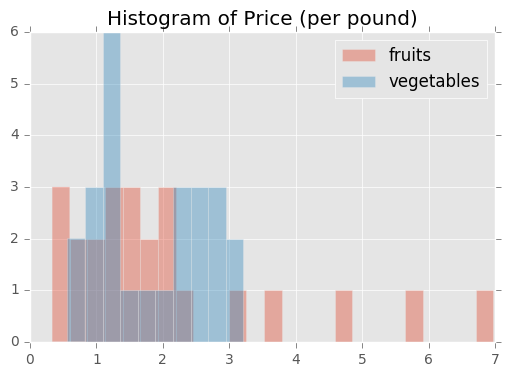

In [9]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.hist(fruit_fresh['price_per_lb'], bins = 25, alpha=0.4, label = 'fruits')
plt.hist(vegetable_fresh['price_per_lb'], bins = 10, alpha=0.4, label = 'vegetables')
plt.title('Histogram of Price (per pound)')
plt.legend()
plt.show()

<p>We can find that the prices of fruits are more dispersed, with some extreme high values. However, the prices of vegetables are within a small range.</p>

<h5>3. Which foods are the best value for the price?</h5>

In [10]:
fresh[fresh['price_per_cup'] == min(fresh['price_per_cup'])]

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,vegetables,potatoes,Fresh1,0.56432,0.811301,0.264555,0.184017


<p>As a cup is the unit of measurement for Federal fruit and vegetable consumption recommendations (<a herf="https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/">link</a>),  the food with the least price per cup should be the one of the best value for the price. Among all kinds of foods, potatoes have the lowest price per cup.</p>

<h5>4. What's something surprising about this data set?</h5>

In [11]:
fresh[fresh['food']=='cabbage']

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
1,vegetables,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
2,vegetables,cabbage,Fresh red cabbage1,1.056450,0.779107,0.330693,0.448412


<p>There are two kinds of fresh cabbage in the market.</p>

<h5>5. Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.</h5>

<p> We want a kind of food with yield as high as possible, and with price per cup as low as possible.</p>

In [12]:
print min(fresh['yield']),max(fresh['yield'])

0.375308641975 1.16


In [13]:
print min(fresh['price_per_cup']),max(fresh['price_per_cup'])

0.184017330629 2.58227203905


In [14]:
fresh['standardized_yield'] = (fresh['yield'] - min(fresh['yield']))/(max(fresh['yield']) - min(fresh['yield']))
fresh['standardized_price_per_cup'] = (fresh['price_per_cup'] - min(fresh['price_per_cup']))/(max(fresh['price_per_cup']) - min(fresh['price_per_cup']))
fresh['index'] = ((fresh['standardized_yield']**2 + (1-fresh['standardized_price_per_cup'])**2)/2)**0.5

<p>I define an index in order to take yield and price per cup together into consideration. First I rescale these 2 values in to range of between 0 and 1, then</p>
$$index = \sqrt{\frac{(standardied\_yield^{2} + (1 - standardied\_price\_per\_cup)^{2}}{2} } $$
<p>The index in between 0 and 1. The larger the index, the better the food provides the combination.</p>

In [15]:
result = fresh.sort_values(by = ['index'], axis = 0, ascending = False)
result.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,standardized_yield,standardized_price_per_cup,index
1,vegetables,collard_greens,Fresh1,2.630838,1.160000,0.286601,0.650001,1.000000,0.194301,0.908061
1,vegetables,cucumbers,"Fresh, consumed with peel1",1.295931,0.970000,0.264555,0.353448,0.757867,0.070648,0.847956
1,vegetables,lettuce_iceberg,Fresh1,1.213039,0.950000,0.242508,0.309655,0.732379,0.052387,0.846862
1,vegetables,kale,Fresh1,2.807302,1.050000,0.286601,0.766262,0.859817,0.242779,0.810145
1,vegetables,potatoes,Fresh1,0.564320,0.811301,0.264555,0.184017,0.555623,0.000000,0.808924


<p>Collard_greens, cucumbers and lettuce_iceberg are the best foods in this criteria.</p>

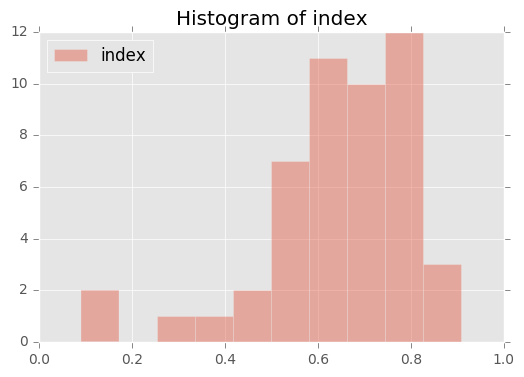

In [16]:
plt.hist(fresh['index'], bins = 10, alpha=0.4, label = 'index')
plt.title('Histogram of index')
plt.legend(loc = 2)
plt.show()

<p>We can find that this index for most of the foods are between 0.5 and 0.8.</p>